##### Train model to predict images of cats and dogs using CLASSIC L-layer model without TensorFlow / PyTouch.

In [134]:
from keras.datasets import mnist
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import PIL  # to open and get Image's size
import os
from glob import glob
import pathlib  # For defining data path 
from keras.utils import to_categorical # convert your class labels into one-hot encoded vectors,

#### Step 1: Data understanding
- The dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/marquis03/cats-and-dogs/data)
- Set up file path
- Check image shape
- Check no. of output classes to decide whether to use Binary or categorical cross-entropy

In [135]:
# Read csv file:
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("val.csv")
train_df

,image:FILE,category
0,train/cat/Sphynx_159_jpg.rf.022528b23ac690c34a...,0
1,train/cat/Persian_139_jpg.rf.0e67f7e0a76dc49d0...,0
2,train/cat/Bengal_150_jpg.rf.05c93a40014062c5ae...,0
3,train/cat/Bombay_140_jpg.rf.15757f698af74453f3...,0
4,train/cat/Persian_128_jpg.rf.16da80c477d1ca2bc...,0
...,...,...
270,train/dog/scottish_terrier_128_jpg.rf.cb2c8f24...,1
271,train/dog/samoyed_149_jpg.rf.c6bf305eaa640bc12...,1
272,train/dog/english_setter_172_jpg.rf.cb3f08fd8d...,1
273,train/dog/shiba_inu_135_jpg.rf.ca95dbdfbdf5b08...,1


- Based on result above, cat = 0, dog = 1.

In [136]:
# Extract file paths (x) and labels (Y) for train dataset
image_paths = train_df['image:FILE'].values
labels = train_df['category'].values

# Initialize empty lists for images (cat and dog) and their corresponding labels (0 and 1)
images = []
image_labels = []

# Set image target size
size = (64, 64)

# Loop through all the images & labels and read them using PIL
for path, label in zip(image_paths, labels):
    # Construct the full image path  (cwd() - get current working dir = Binary Cross-Entropy folder)
    img_path = os.path.join(os.getcwd(), path)  
    # Result: img_path = Binary Cross-Entropy/train/cat/.img & Binary Cross-Entropy/train/cat/.img corresponding labels

    # Read the image using PIL (Pillow)
    img = PIL.Image.open(img_path)  # Open the image

    if img is not None:  # Check if image was successfully loaded
        img = img.resize(size) # set (300,300) dimension
        images.append(img)  # Add image to the list
        image_labels.append(label)  # Add label to the list

# Convert the list of images and labels into NumPy arrays
train_images = np.array([np.array(img) for img in images])  # Convert each image to a NumPy array
train_labels = np.array(image_labels)  # Convert labels to NumPy array

In [137]:
# Extract file paths (x) and labels (Y) for validation dataset
image_paths = val_df['image:FILE'].values
labels = val_df['category'].values

# Initialize empty lists for images (cat and dog) and their corresponding labels (0 and 1)
images = []
image_labels = []

# Set image target size
size = (64, 64)

# Loop through all the images & labels and read them using PIL
for path, label in zip(image_paths, labels):
    img_path = os.path.join(os.getcwd(), path)  
    img = PIL.Image.open(img_path)  

    if img is not None:  # Check if image was successfully loaded
        img = img.resize(size)
        images.append(img)  # Add image to the list
        image_labels.append(label)  # Add label to the list

# Convert the list of images and labels into NumPy arrays
val_images = np.array([np.array(img) for img in images]) 
val_labels = np.array(image_labels) 

In [138]:
# Check image dimesnions and shapes:
# Train images and labels arrays
print("Total number of train images: ", train_images.shape[0])  
print("Total number of train images labels (0 and 1): ", train_labels.shape[0])  
print("Train images dimension: ", train_images.shape[1:]) 
print("-------------------------------------")

# Validaiton images and labels arrays
print("Total number of validation images: ", val_images.shape[0])  
print("Total number of validation images labels (0 and 1): ", val_labels.shape[0])  
print("Validation images dimension: ", val_images.shape[1:]) 
print("-------------------------------------")

# Trian and validation images shapes
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("val_images shape: " + str(val_images.shape))
print("val_labels shape: " + str(val_labels.shape))


Total number of train images:  275
Total number of train images labels (0 and 1):  275
Train images dimension:  (64, 64, 3)
-------------------------------------
Total number of validation images:  70
Total number of validation images labels (0 and 1):  70
Validation images dimension:  (64, 64, 3)
-------------------------------------
train_images shape: (275, 64, 64, 3)
train_labels shape: (275,)
val_images shape: (70, 64, 64, 3)
val_labels shape: (70,)


- In order for Dense layers to work later, we need to **flatten** the images (300x300x3) into 270k-dimensional vectors.

In [139]:
train_labels[:120]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [140]:
# Check output classes
total_classes = np.unique(train_labels)
number_of_total_classes = len(total_classes)
print('Total number of output classes : ', number_of_total_classes)
print('All Output classes : ', total_classes)

Total number of output classes :  2
All Output classes :  [0 1]


- Since we have 2 output classes (neurons), we will use **Binary Cross-Entropy** as our loss function.

$$\text{Binary Cross-Entropy} = - \left[ y \log(p) + (1 - y) \log(1 - p) \right]$$


#### Binary cross-entropy vs Categorical cross-entropy loss functions
- **Binary CE (Sigmoid):** Binary Classification (2 classes only)
    - Example usage: Classifying images of "spam" or "not spam" labels  or whether an image is of a "cat" or "dog".
    
$$\text{Binary Cross-Entropy} = - \left[ y \log(p) + (1 - y) \log(1 - p) \right]$$

- where:
    - $p =$ true label $∈{0,1}$
    - $p =$ predicted probability of class 1 (e.g "spam").
    - It is Bernoulli target:
        - if $p > 0.5$, model predicts as spam (class 1)
        - if $p < 0.5$, model predicts as not spam (class 0)
        - Output neuron: one only.

- **Categorical CE (Softmax):** Multi-class Classification (more than 2 classes)
    - Example usage: classifying image of "cat", "dog", and "bird" or digit classification (0 - 9).
    - Exactly one class is true among $C$ classes
    - Output neurons: number of $C$ classes

$$\text{Categorical Cross-Entropy} = - \sum_{i=1}^{C} y_i \log(p_i)$$

- where:
    - $C =$ number of class
    - $y_i =$ true label in one-hot encoded vector (0 or 1).
    - $p_i =$ predicted probability of class i.


Text(0.5, 1.0, 'Label : 1')

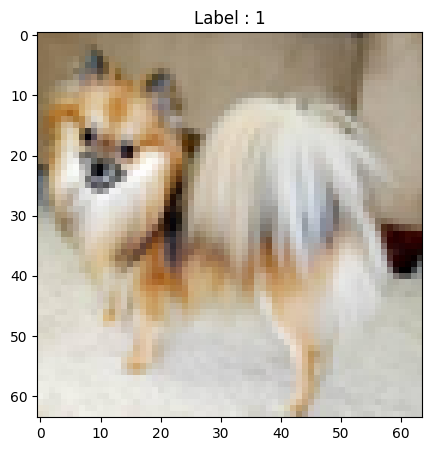

In [141]:
# Display the first image in testing data 
plt.figure(figsize=[10,5])

plt.imshow(val_images[67,:,:], cmap='gray') # shows index 1 image of size 300x300 pixels 
plt.title(f"Label : {val_labels[67]}")

#### Step 2: Data Preprocessing: 

In [142]:
# Resahpe from an array of dimension 28x28 to array of dimention 784 so that it becomes 2D array. 
train_x = train_images.reshape(train_images.shape[0], -1) # -1 will automatically be calculated into 28 * 28
val_x = val_images.reshape(val_images.shape[0], -1)

# Standardize data to have feature values between 0 and 1. (255 is max pixel value for 8-bit image)
train_x = train_x/255.
val_x = val_x/255.

print(train_x.shape)
print(val_x.shape)

(275, 12288)
(70, 12288)


In [143]:
# Convert them into 2D array
train_y = train_labels
val_y = val_labels

train_y = train_y.reshape(1, -1)
val_y = val_labels.reshape(1, -1)

#### Step 3: Build Model: **L-Layer Model**

- $[LINEAR -> RELU]\times(L-1) -> LINEAR -> SIGMOID$
    - where:
        - $L$: Total number of layers
        - $L-1$: Total number of Hidden layers


- Example usage:
    - If L = 5 layers (L-1 = 4 hidden layers), 

        - Hidden Layer 1: [LINEAR -> RELU]

        - Hidden Layer 2: [LINEAR -> RELU]

        - Hidden Layer 3: [LINEAR -> RELU]
        
        - Hidden Layer 4: [LINEAR -> RELU]
        - Output Layer: LINEAR -> SIGMOID 
- Linear activation function `f(x)=x`: output is directly proportional to the input. (output is same as input).

- RELU (Rectified Linear Unit) `f(x)=max(0,x)`: It is a non-linear activation function that transforms any nagtive input to 0. 

- SIGMOID $f(x) = \frac{1}{1 + e^{-x}}​$: It is a non-linear activation function that output values between 0 and 1. 
    - Where if `f(x)` > 0.5 = cat (1).
    - Or if `f(x)` < 0.5 = dog (0).

- Define the layers: 

    - `layers_dims = [n_x, n_h, n_h, n_h, n_y]` 
    - Input layer `(n_x)`: The number of input features (784).

    - Hidden layers `(n_h)`: The number of hidden neurons in the hidden layer (128).
        - Numbers can be `32, 64, 128, 256`. 
        - If we give too high number of neurons (256 etc), then model may **overfit**.

    - Output layer `(n_y)`: The number of output neurons (10) since we have 10 numbers.

$$\text{Binary Cross-Entropy} = - \left[ y \log(p) + (1 - y) \log(1 - p) \right]$$

In [144]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        # He Initialization (recommended for ReLU)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [145]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L + 1):
        parameters[f"W{l}"] -= learning_rate * grads[f"dW{l}"]
        parameters[f"b{l}"] -= learning_rate * grads[f"db{l}"]
    
    return parameters

In [146]:
def linear_activation_forward(A_prev, W, b, activation):
    # Compute the linear part (Z = W.A_prev + b)
    Z = np.dot(W, A_prev) + b
    
    if activation == "relu":
        A = np.maximum(0, Z)  # ReLU activation function
    elif activation == "sigmoid":
        A = 1 / (1 + np.exp(-Z))

    cache = (A_prev, W, b, Z)
    
    return A, cache

In [147]:
def linear_activation_backward(dA, cache, activation):
    A_prev, W, b, Z = cache
    
    m = A_prev.shape[1]  # Number of training examples
    
    if activation == "relu":
        # Derivative of ReLU
        dZ = dA.copy()
        dZ[Z <= 0] = 0
    elif activation == "sigmoid":
        A = 1 / (1 + np.exp(-Z))
        dZ = dA * A * (1 - A)
    
    dW = (1 / m) * np.dot(dZ, A_prev.T)  # Gradient of the weights
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)  # Gradient of the biases
    dA_prev = np.dot(W.T, dZ)  # Gradient for the previous activation
    
    return dA_prev, dW, db


In [148]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # number of layers
    m = AL.shape[1]
    
    # Initializing the backpropagation (Direct dZ for Output Layer)
    dZL = AL - Y
    
    # Lth layer (SIGMOID -> LINEAR) gradients
    current_cache = caches[L-1] # The last cache
    A_prev, W, b, Z = current_cache
    grads["dW" + str(L)] = (1/m) * np.dot(dZL, A_prev.T)
    grads["db" + str(L)] = (1/m) * np.sum(dZL, axis=1, keepdims=True)
    grads["dA" + str(L-1)] = np.dot(W.T, dZL)
    
    # Loop from L-2 to 0 for hidden layers (RELU -> LINEAR)
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [149]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2   # number of layers
    
    # Implement [LINEAR -> RELU]*(L-1)
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID (Output Layer)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid")
    caches.append(cache)
            
    return AL, caches

In [150]:
# Binary Cross-Entropy Loss (dealing with more than 2 classes (0 - 9))
def compute_cost(AL, Y):
    m = Y.shape[1] # 70 because train_y is (270k, 70) after transpose. 
    cost = - (1 / m) * np.sum(Y * np.log(AL + 1e-8) + (1 - Y) * np.log(1 - AL + 1e-8)) # Added epsilon to avoid log(0)
    return cost


- Added `1e-8` to prevent $log(0)$ from going undefined values. 

In [151]:
# val_x should be in shape of (270k, m):
val_y = val_y.T

In [153]:
# Train model: 
layers_dims = [12288, 64, 16, 1] # 4-layer model

def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations):
    parameters = initialize_parameters_deep(layers_dims)
    costs = []
    
    for i in range(num_iterations):
        # Forward propagation
        AL, caches = L_model_forward(X.T, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
        
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
            
    return parameters, costs

# Run training
parameters, costs = L_layer_model(train_x, train_y, layers_dims,  learning_rate = 0.01, num_iterations=800)

Cost after iteration 0: 0.7274535715595314
Cost after iteration 100: 0.5636897851133497
Cost after iteration 200: 0.5174419184728806
Cost after iteration 300: 0.4828468745079928
Cost after iteration 400: 0.3963546938486531
Cost after iteration 500: 0.3296099057985096
Cost after iteration 600: 0.2802416207034771
Cost after iteration 700: 0.19393278331388802


#### Testing model's prediction

In [154]:
# L-Model Prediction:
def predict(X, y, parameters):
    """
    X: Input data (images) of shape (m, 270000)
    y: One-hot encoded labels of shape (m, 70)
    parameters: Dictionary containing all trained W and b for L layers
    """
    m = X.shape[0]
    
    # 1. Use the generalized Forward Pass function
    AL, _ = L_model_forward(X.T, parameters)
    
    # 2. Convert probabilities to class labels (0-9)
    predictions = (AL >= 0.5).astype(int)     # (1, m)
    
    # 3. Calculate accuracy
    accuracy = np.mean(predictions == y)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    return predictions

In [155]:
# Assuming your layers_dims was [784, 128, 64, 10]
print("--- L-layer Model Training Accuracy ---")
p_train = predict(train_x, train_y, parameters)

print("\n--- L-layer Model Test Accuracy ---")
p_test = predict(val_x, val_y, parameters)

--- L-layer Model Training Accuracy ---
Accuracy: 95.27%

--- L-layer Model Test Accuracy ---
Accuracy: 59.88%


- In conclusion, L-layer model has an accuracy of 59.88%. 
    - This is a clear sign that it is **overfitting** (memorized too much on train dataset). 
        - Possible reasons: 
            - Data disparity (we got 275 train images while 70 validation images). 
- Improvements:
    - Reduce input dimensionality (downscale images, PCA, CNN).
    - Add dropout layer that drop 30% neurons.
    - Increase data by an order of magnitude (via augmentor that rotates, flip or scale images).
    - Use convolution instead of dense layers.